# Cascade

learning layers of abstractions :) 

#### initialise nb

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



from eden.util import configure_logging
import logging

configure_logging(logging.getLogger(),verbosity=0)
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')

# data source, see introduction for details.
from eden_extra.converter.graph.gspan import gspan_to_eden
from itertools import islice

def get_graphs(dataset_fname='../toolsdata/bursi.pos.gspan', size=100):
    return islice(gspan_to_eden(dataset_fname),size)

def get_graphss(dataset_fname='../toolsdata/bursi.neg.gspan', size=100):
    return islice(gspan_to_eden(dataset_fname),size)

import learnedlayer.cascade as cascade


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


minortransform_fit


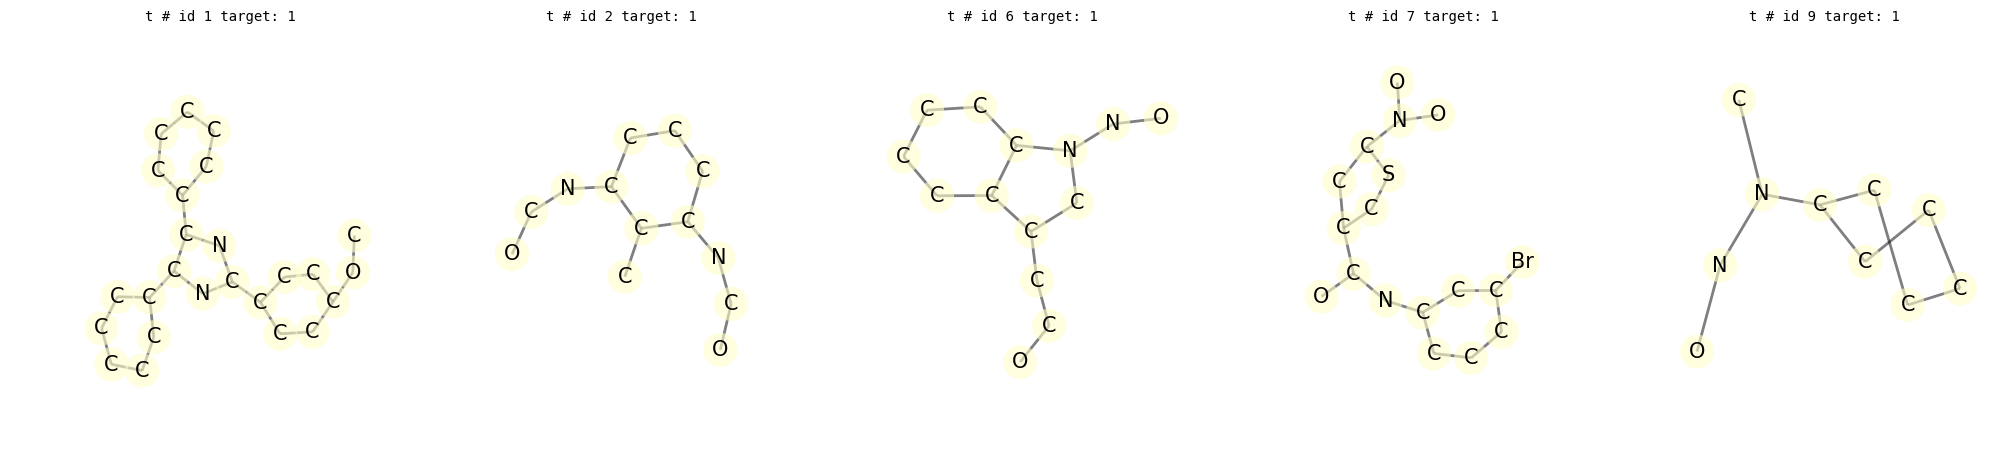

minortransform_scores


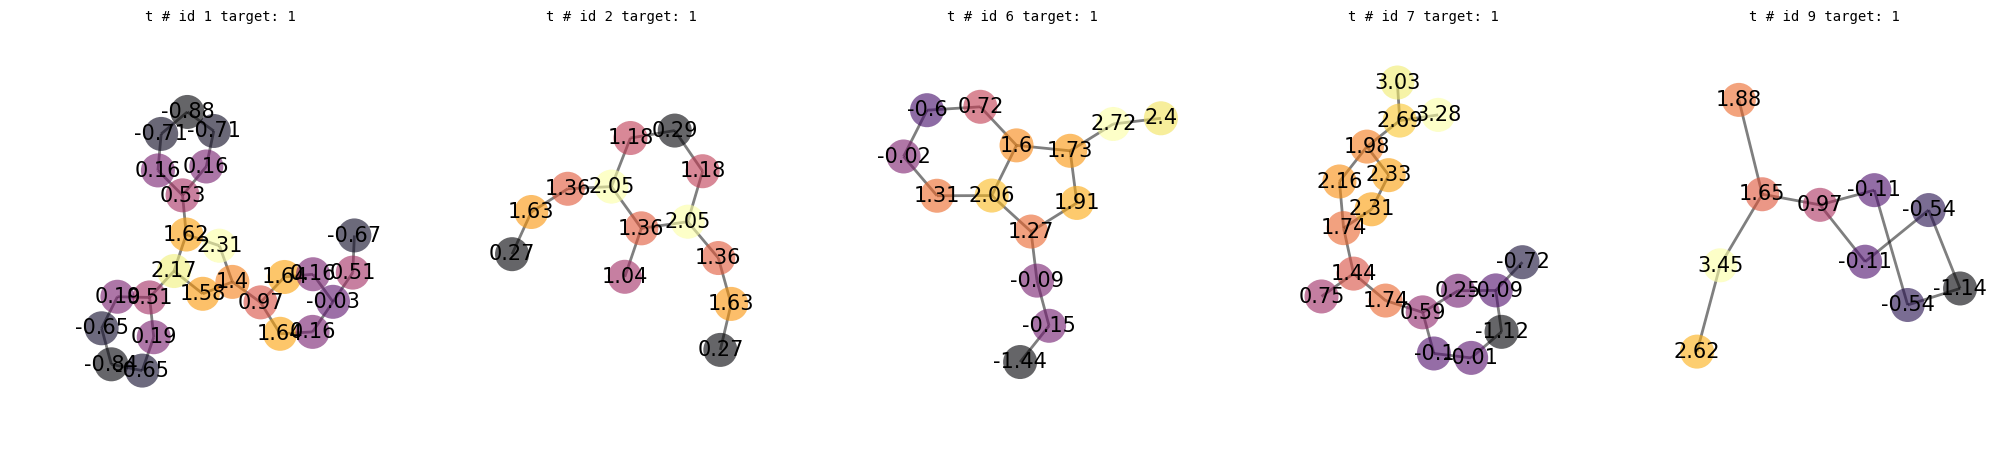

minortransform  transform. the new layer  


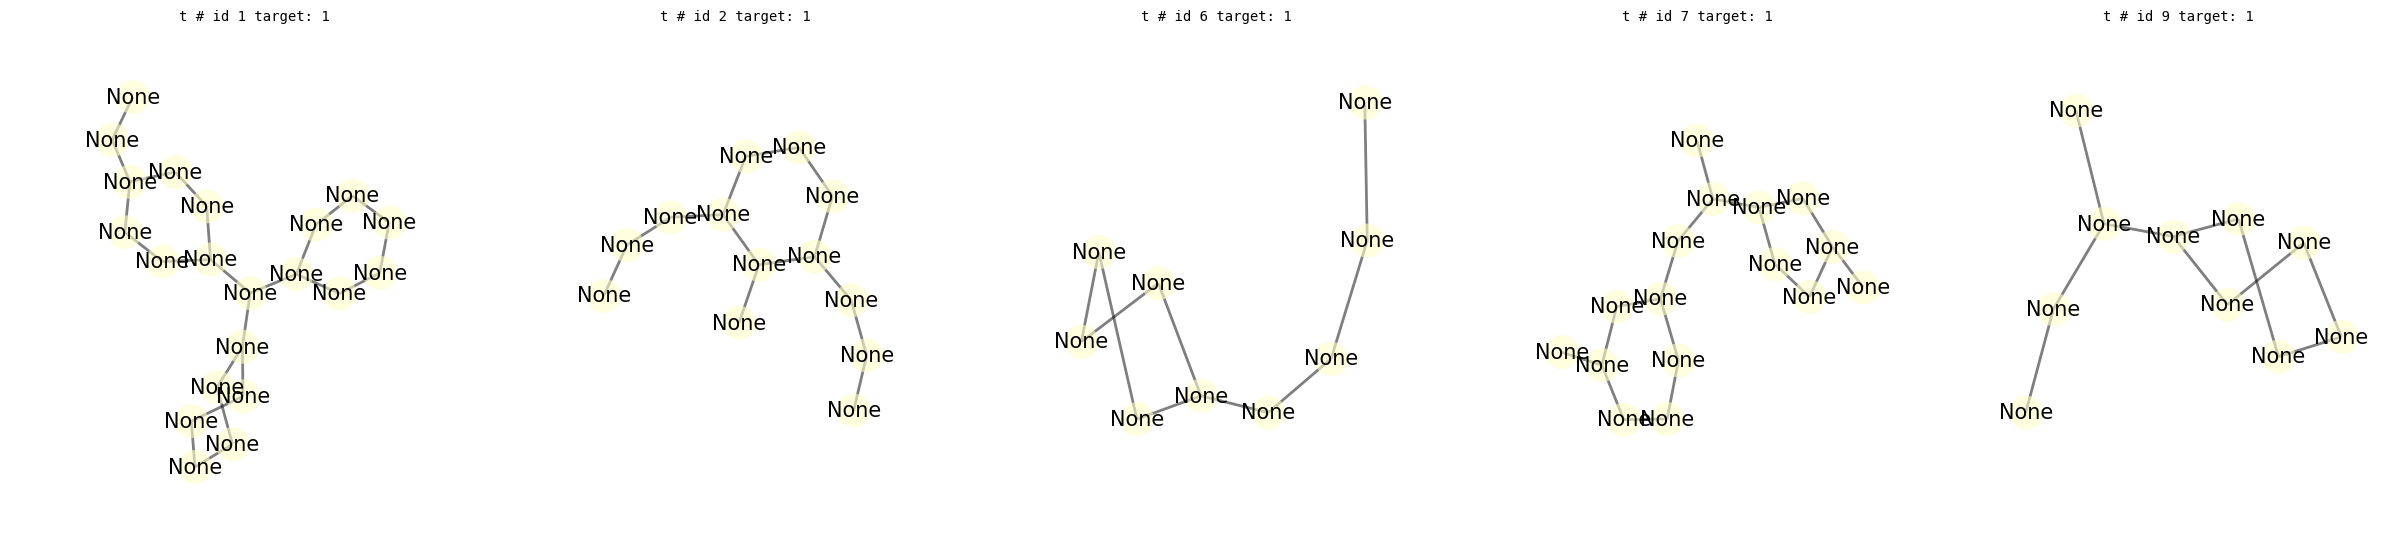

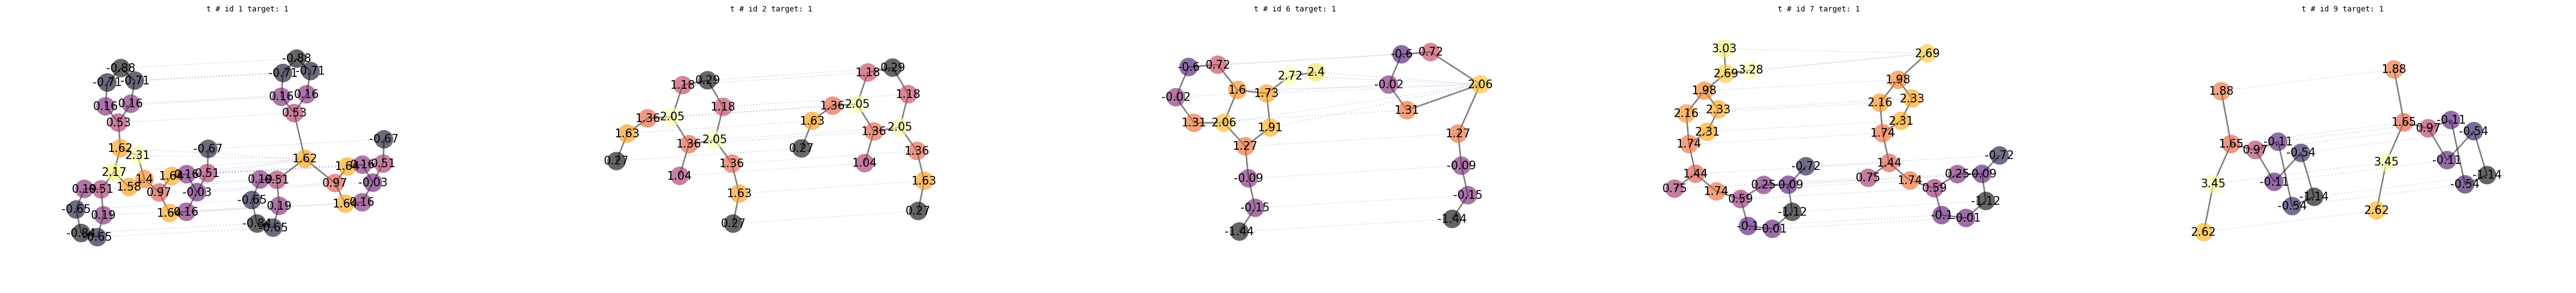

CPU times: user 16.3 s, sys: 5.14 s, total: 21.4 s
Wall time: 17.1 s


In [8]:
%%time
# Testing my evil plans 

import learnedlayer.cascade as cascade
from graphlearn.minor import decompose
from graphlearn.utils import  draw

'''
graphs = get_graphs(size=200)
mycascade = cascade.Cascade(depth=2,debug=True,multiprocess=True,max_group_size=5,min_group_size=3, num_classes=1) 
graphs = mycascade.fit_transform(graphs)
draw.graphlearn_layered2(graphs[:5])
'''
'''
import base64
import dill
def dump64(g,**argz):
    return base64.b64encode(dill.dumps(g))+'\n\n'
draw.graphlearn = lol
'''
for i in range(1):
    graphs = get_graphs(size=300)
    graphss = get_graphss(size=300)
    mycascade = cascade.Cascade(depth=1,debug=True,multiprocess=True,max_group_size=6,min_group_size=2, num_classes=2) 
    graphs = mycascade.fit_transform(graphs,graphss)
    draw.graphlearn_layered2(graphs[:5],vertex_label='importance')


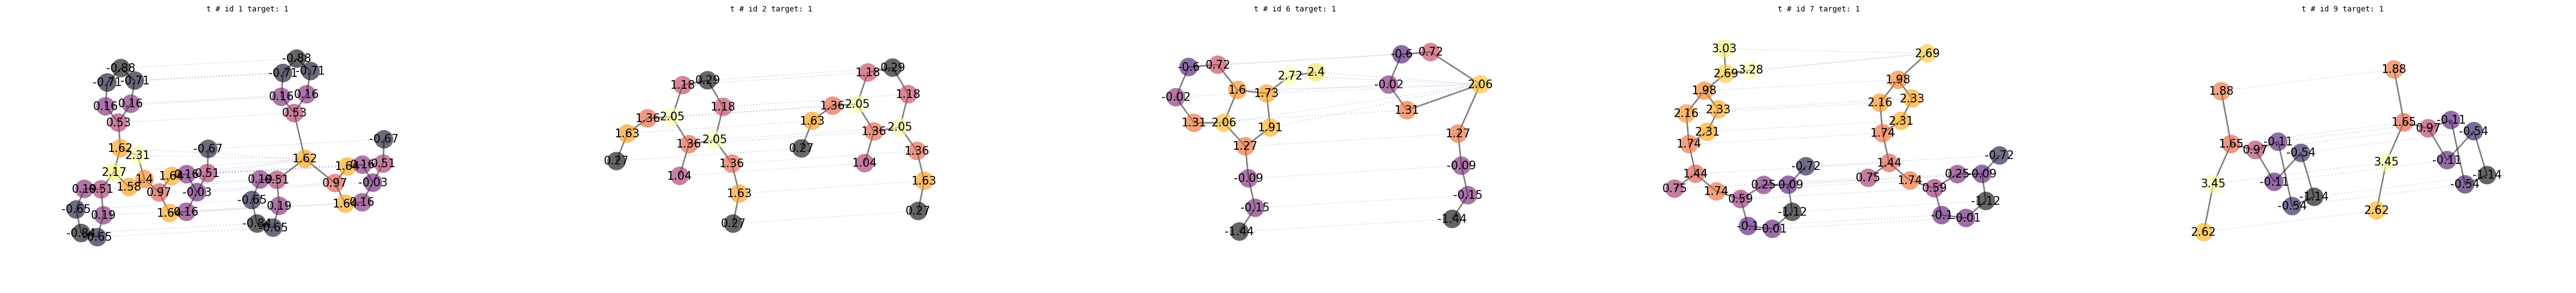

In [9]:
from graphlearn.utils import  draw
draw.graphlearn_layered2(graphs[:5],vertex_label='importance')

In [10]:
from graphlearn.minor import decompose
from graphlearn.utils import draw
decomp=decompose.MinorDecomposer()
mystuff = map(decomp.make_new_decomposer, graphs)
print len(mystuff)
mystuff = [ arg.compress_layers() for arg in mystuff]
print len(mystuff)
mystuff = [arg.pre_vectorizer_graph(nested=True) for arg in mystuff]
print len(mystuff)

#draw.graphlearn_layered(mystuff[:10])
#print 'asdasdasd'

600
600
600


### starts here

In [11]:
%%time
#from graphlearn.utils import draw
import learnedlayer.cascade as cascade
graphs = list(get_graphs(size=200))
graphss = list(get_graphss(size=200))
mycascade = cascade.Cascade(depth=2,debug=False,multiprocess=True)

graph = mycascade.fit_transform(graphs,graphss)

#draw.graphlearn_layered2(graphs[:5])
#draw.graphlearn_layered2(g2[:5])


# ok was will ich von der cascade?
# transform muss noch laufen.. und zwar so dass unten graphs rausfallen.
#draw.graphlearn(graphs[:5])


CPU times: user 16.7 s, sys: 28 ms, total: 16.7 s
Wall time: 16.7 s


-------------------------------